<a href="https://colab.research.google.com/github/JagpreetJakhar/LeetCode_75/blob/main/Copy_of_Assignment_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your username (used for marking):

In [1407]:
username = 'acq22jj'

# COM4509/6509 Coursework Part 2

Hello,
This is the *second* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Q1 straight away then you may still be able to progress with the other questions.

### Overview
This part of the assignment will cover:
- Logistic regression and PCA: 13 Marks, lecture 6 and 8. 
- Neural networks: 16 Marks, lecture 7 and 8.
- Auto-encoders: 16 Marks, lecture 8 and 9.

### What to submit

- You need to submit **two jupyter notebooks** (not zipped together) and a **pdf** copy of part 2, named:

```
assignment_part1_[username].ipynb
assignment_part2_[username].ipynb
assignment_part2_[username].pdf
```

replacing `[username]` with your username, e.g. `abc18de`.
- **Please execute the cells before your submission**. The **pdf** copy will be used as a backup in case the data gets corrupted and since we cannot run all the notebooks during marking. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the two python notebooks *and the pdf*.

### Assessment Criteria 

- The marks are indicated for each part: You'll get marks for correct code that does what is asked and gets the right answer. **These contribute 45**. You should make sure any figures are plotted properly with axis labels and figure legends.
- There are also **5 marks for "Code quality"** (includes both readability and efficiency).

### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).

### Use of unfair means

This is an individual assignment, while you may discuss this with your classmates, please make sure you submit your own code. You are allowed to use code from the labs as a basis of your submission.

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).



### Reproducibility and readibility
Whenever there is randomness in the computation, you MUST set a random seed for reproducibility. Use your UCard number XXXXXXXXX (or the digits in your registration number if you do not have one) as the random seed throughout this assignment. You can set the seeds using torch.manual_seed(XXXXX) and np.random.seed(XXXXX).
Answers for each question should be clearly indicated in your notebook. While code segments are indicated for answers, you may use more cells as necessary.  All code should be clearly documented and explained.
Note: You will make several design choices (e.g. hyperparameters) in this assignment. There are no “standard answers”. You are encouraged to explore several design choices to settle down with good/best ones, if time permits.



## Question 1: Logistic regression and PCA [13 marks]

MedMNIST is a collection of healthcase based datasets that are pre-processed to match to format of the original MNIST dataset. In this questions, you will perform logistic regression and dimension reduction using PCA on the **PneumoniaMNIST** dataset from the MedMNIST. The task for this dataset is to detect whether a chest X-ray shows signs of Pneumonia or not and is therefore a binary classification task.


### 1.1: Data download [1 mark]

The code cell belows provides the code to download the dataset as a compressed numpy file directly from the [MedMNIST website](https://doi.org/10.5281/zenodo.6496656
). If you prefer, you can follow the instructions at https://github.com/MedMNIST/MedMNIST to download and load the data.



In [1408]:
import numpy as np
import random
import urllib.request
import os
random_seed = np.random.seed(1784086) #UCard number
# Download the dataset to the local folder
urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/pneumoniamnist.npz?download=1', 'pneumoniamnist.npz')

# Load the compressed numpy array file
dataset = np.load('./pneumoniamnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)


train_images (4708, 28, 28) uint8
val_images (524, 28, 28) uint8
test_images (624, 28, 28) uint8
train_labels (4708, 1) uint8
val_labels (524, 1) uint8
test_labels (624, 1) uint8


**1.1a** After downloading the data, merge the validation set into the training set and reshape the images so that each is a 1D array. Then scale the pixel values so they are in the range [0,1].

In [1409]:
# Write your code here.
train_img = np.concatenate((dataset['train_images'],dataset['val_images']),axis = 0)
train_label = np.concatenate((dataset['train_labels'],dataset['val_labels']),axis = 0)
test_img = dataset['test_images'] 
test_label = dataset['test_labels']
#train_img_flt=train_img.flatten()
#train_label_flt = train_label.flatten()
train_img_scaled = train_img.reshape(len(train_img),-1)
train_img_scaled = train_img_scaled/255
train_img_scaled.shape
test_img = test_img.reshape(len(test_img),-1)
test_img = test_img/255
test_img.shape,train_img_scaled.shape

((624, 784), (5232, 784))

### 1.2: Dimensional reduction and training [6 marks]

**1.2a** Using the Scikit-learn PCA class, transform the training and test data into **at least seven** different sets of reduced dimensions, i.e create 7 alternate datsets with ($k_1, k_2, ..., k_7$) number of features. **Briefly explain** your choice reduced features. Keep a copy of the unreduced data so that in total you have **eight** datasets.


You should fit the tranformation based on the training data and use that to transform the test data. You can find details of the PCA transformation class [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

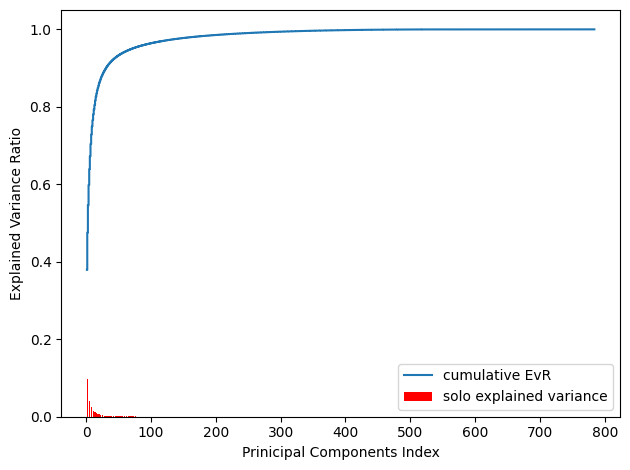

In [1410]:
import time
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition  import PCA
covariance_matrix = np.cov(train_img_scaled.T) # constructing the covariance matrix
# eigen vectors  >> principal components, eigen values  >> magnitude
eigen_vals,eigen_vecs = np.linalg.eigh(covariance_matrix) # performing eigendecompistion
eigen_vals.shape,eigen_vecs.shape
# The target is to selct the subset of eigenvectors which contain most of the information(variance)
tot = sum(eigen_vals)
sorted_eigen_vals = sorted(eigen_vals,reverse = True)
variance_explained = []
for i in sorted_eigen_vals:
    variance_explained.append(i/tot)
tot_var_exp = np.cumsum(variance_explained) #Return the cumulative sum of the elements along a given axis.
plt.bar(range(1,len(variance_explained)+1),variance_explained,align='center',label='solo explained variance',color='red')
plt.step(range(1,len(tot_var_exp)+1),tot_var_exp,where='mid',label = 'cumulative EvR')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Prinicipal Components Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [1411]:
#Another way to calculate number of features(dimensions) containing 97 percent of variance
pca = PCA(0.97)
X_reduced = pca.fit_transform(train_img_scaled)
pca.n_components_

118

The Plot shows that first few principal components account for majority of the variance in the dataset.
therefore, number of features to be selected should be between 1 and ~150.


In [1412]:
# Write your code here.
def PCA_dataset_creator(n,train,test):
    dim_red = PCA(n)
    dim_red.fit(train)
    X = dim_red.transform(train)
    Y = dim_red.transform(test)
    return X,Y,dim_red.explained_variance_ratio_

pca_features = [2,5,20,30,40,100,160]
X = []
y =[]
variance_train = []

for i in pca_features:
  j,k,c =PCA_dataset_creator(i,train_img_scaled,test_img)
  X.append(j)
  y.append(k)
  variance_train.append(sum(c))
variance_train.append(1)

In [1413]:
variance_train

[0.47537353213694905,
 0.6390790000216946,
 0.8607730559770006,
 0.8987891962478435,
 0.9196673453065864,
 0.9639882889254432,
 0.979416368725525,
 1]


**1.2b** Train **eight** logistic regression classifiers (LRC): one on the original features (unreduced), and seven on PCA features with seven different dimensions in 1.2a, i.e., LRC on $k_1$ PCA features; LRC on $k_2$ PCA features; ..., LRC on $k_7$ PCA features and LRC on the unreduced data. You will need to decide on any options for the logistic regression fitting and **explain** which choices you make.
You can use the Scikit Learn Logistic Regression classifier, further information is given [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).



In [1414]:
# Write your code here.
LRC = []
predict_LR_train = []
predict_LR_test = []
LRC_test = LR(random_state=0,max_iter=1000).fit(test_img,test_label)
for i in range(len(X)):
  LRC.append(LR(random_state=0,max_iter=1000).fit(X[i],train_label))

k=0
for j in LRC:

  x = j.score(X[k],train_label)
  predict_LR_train.append(x)
  p = j.score(y[k],test_label)
  predict_LR_test.append(p)
  k+=1
LRC_full = LR(random_state=0,max_iter=1000).fit(train_img_scaled,train_label)
LRC.append(LRC_full)
predict_LR_train.append(LRC_full.score(train_img_scaled,train_label))

d:\work\work\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\work\work\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\work\work\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\work\work\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [1415]:
predict_LR_test.append(LRC_full.score(test_img,test_label))

In [1416]:
predict_LR_test


[0.8157051282051282,
 0.8541666666666666,
 0.8301282051282052,
 0.8269230769230769,
 0.8349358974358975,
 0.8461538461538461,
 0.844551282051282,
 0.8477564102564102]

In [1417]:
predict_LR_train

[0.8797782874617737,
 0.8944954128440367,
 0.9457186544342507,
 0.9533639143730887,
 0.955848623853211,
 0.9648318042813455,
 0.966934250764526,
 0.9713302752293578]

### 1.3: Model evaluation [6 marks]

**1.3b** For each of the trained classifiers in 1.2b, calculate the classification accuracy on the training data and the test data. Extract the total explained variance by summing the `PCA.explained_variance_ratio_` for each of your PCA transformations. **Plot** the training accuracy and test accuracy against the total explained variance at each $k_n$. You should include the results for the case trained on the original features, which corresponds to a total explained variance of 1.

In [1418]:
variance_train

[0.47537353213694905,
 0.6390790000216946,
 0.8607730559770006,
 0.8987891962478435,
 0.9196673453065864,
 0.9639882889254432,
 0.979416368725525,
 1]

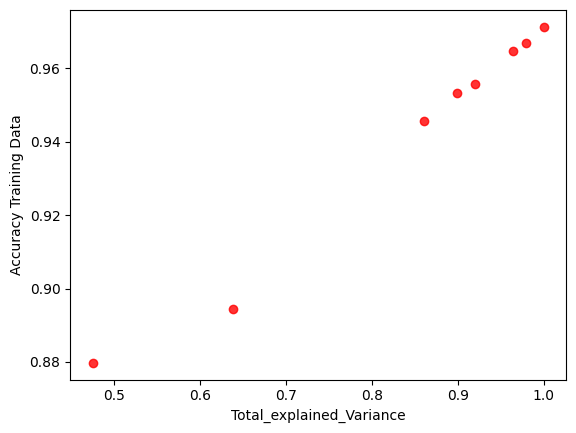

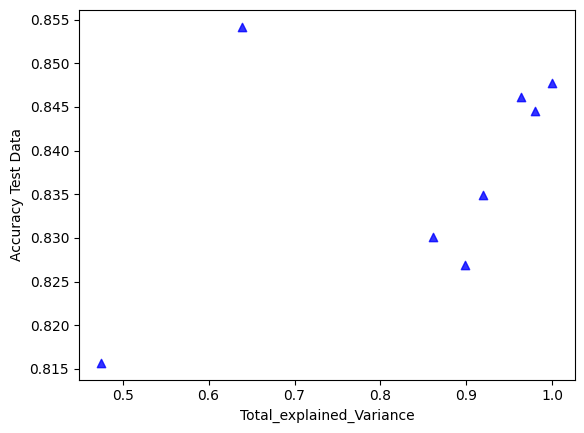

In [1419]:
# Write your code here.
train_vs_variance = plt.figure()
plt.xlabel('Total_explained_Variance')
plt.ylabel('Accuracy Training Data')
plt.scatter(variance_train,predict_LR_train,figure = train_vs_variance,marker = 'o',alpha =0.8,c='red')
test_vs_variance = plt.figure()
plt.xlabel('Total_explained_Variance')
plt.ylabel('Accuracy Test Data')
plt.scatter(variance_train,predict_LR_test,figure = test_vs_variance,marker = '^',alpha =0.8,c='blue')

**1.3b** Describe at least **two** relevant observations from the evaluation results above.

In [1420]:
# Write your answer here. relation between accuracy and no of features
"""
>> Most of the information(variance) int the dataset can be explaiend by a fraction of total number of features,(160),
we can compress the  data with the goal of maintaing most of the relevant information, to not only improve storage space
and efficiency of learning algorithm bu to also improve accuracy by reducing "Curse of Dimensionality".

>> We can see that Logistic Regression classifer works quite well on the reduced feature of subspace of 160 features with accuracy of 96.6
compared to 97% accuracy on all features.
 
"""

'\n>> Most of the information(variance) int the dataset can be explaiend by a fraction of total number of features,(160),\nwe can compress the  data with the goal of maintaing most of the relevant information, to not only improve storage space\nand efficiency of learning algorithm bu to also improve accuracy by reducing "Curse of Dimensionality".\n\n>> We can see that Logistic Regression classifer works quite well on the reduced feature of subspace of 160 features with accuracy of 96.6\ncompared to 97% accuracy on all features.\n \n'

## Question 2: Convolutional neural networks for image recognition [16 marks]

Fashion-MNIST is a dataset of Zalando's article images. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes: 0=T-shirt/top; 1=Trouser; 2=Pullover; 3=Dress; 4=Coat; 5=Sandal; 6=Shirt; 7=Sneaker; 8=Bag; 9=Ankle boot.

It is available online at https://github.com/zalandoresearch/fashion-mnist but here we will use the version built into PyTorch as part of the TorchVision library [see here for  documentation](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST).

In this question, you should PyTorch to train various forms of neural network models to classify these images. You can refer to Lab 7 on how to define and train neural networks with PyTorch. 

### 2.1: Data download and inspection [3 marks]

**2.1a** Use the PyTorch Torchvision API to load both the train and test parts of the Fashion-MNIST dataset. You can use the code used in Lab 7 to load the CIFAR10 as a basis for this.

In [1421]:

import time
import pandas as pd
import json
from IPython.display import clear_output
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
torch.set_printoptions(linewidth=120)



In [1422]:
# Write your code here.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])
train_v_dataset = torchvision.datasets.FashionMNIST('data',train=True,transform =transform,download = True)
test = torchvision.datasets.FashionMNIST('data',transform=transform,train=False,download=True)





**2.1b** Use the `torch.utils.data.random_split` function to split the 60,000 training set into 2 subsets: the first part will be used for training, the second part will be used for validation. You must choose a sensible split of this into the training and validation sets. Create a DataLoader for each of the train, validation, and test splits.

In [1423]:
# Write your code here.
ratio = 0.2
train_t = int((1.0-ratio)* len(train_v_dataset))
val_t = int(ratio * len(train_v_dataset))
train,val = torch.utils.data.dataset.random_split(train_v_dataset,[train_t,val_t])


In [1424]:
num_threads =10
batch_size = 120
train_loader = torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle=True,num_workers=num_threads)
val_loader = torch.utils.data.DataLoader(dataset=val,batch_size=batch_size,shuffle=False,num_workers=num_threads)
test_loader = torch.utils.data.DataLoader(dataset=test,batch_size=batch_size,shuffle=False,num_workers=num_threads)

In [1425]:
f"Train Set contains {len(train_loader.dataset)}",f"Val Set contains {len(val_loader.dataset)}",f"Test Set contains {len(test_loader.dataset)}"

('Train Set contains 48000',
 'Val Set contains 12000',
 'Test Set contains 10000')

**2.1c** Display 2 example images from each of the classes (20 images in total).

In [1426]:
imgs = [data for data, _ in train]
lbls = [label for _, label in train]


In [1427]:
lbls[98]

8

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001D96202D5E0>
Traceback (most recent call last):
  File "d:\work\work\lib\site-packages\torch\utils\data\dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "d:\work\work\lib\site-packages\torch\utils\data\dataloader.py", line 1424, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


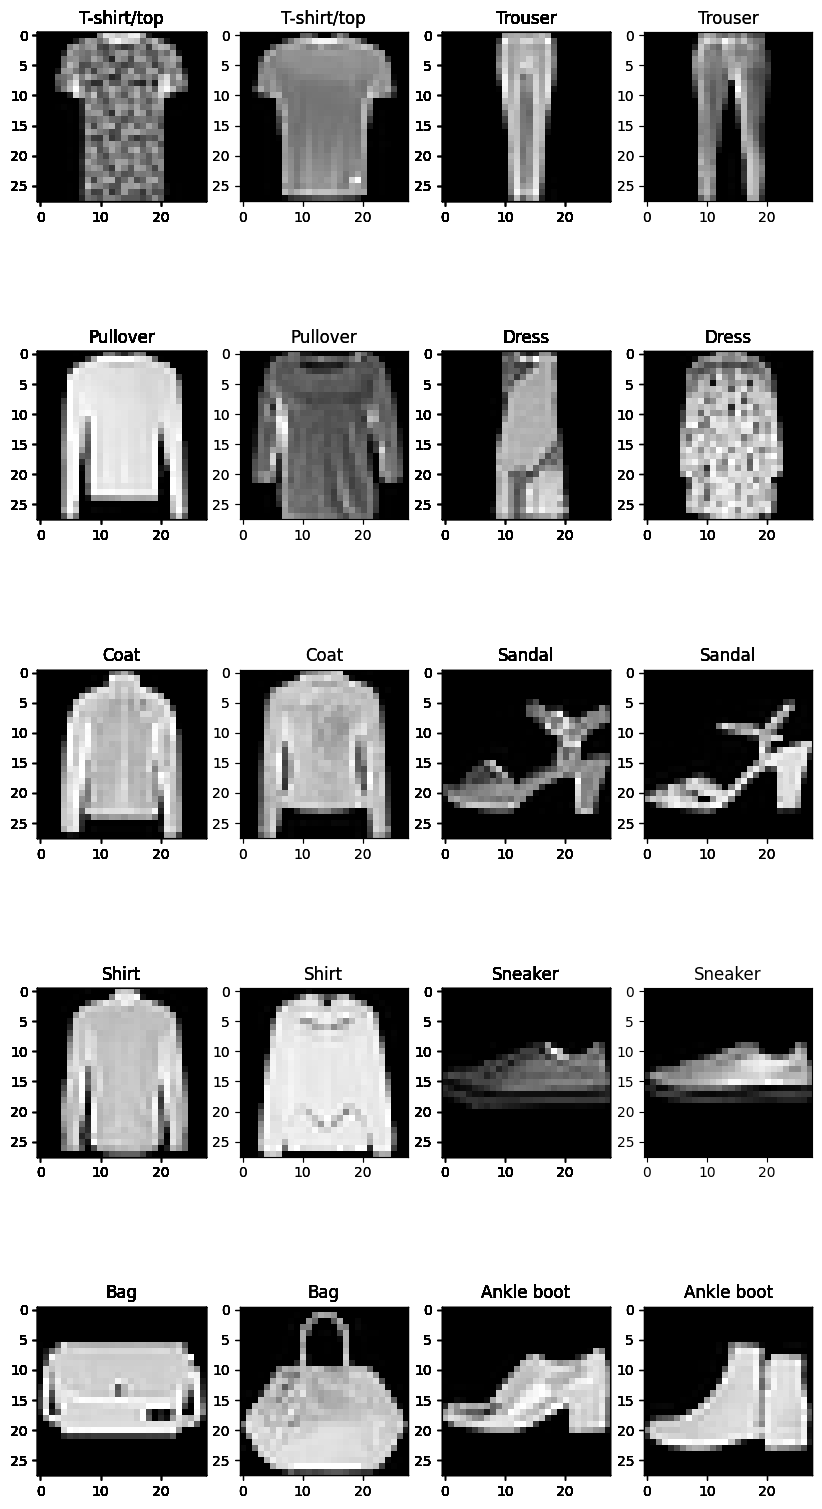

In [1428]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
classes_i = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]
fig = plt.figure(figsize=(10,20))
batch = list(range(0,200))
for j in range(20):
  for i in batch:
    if lbls[i] == classes_i[j]:
      batch.remove(i)
      fig.add_subplot(5, 4, j+1)
      plt.imshow(imgs[i][0])
      plt.title(classes[lbls[i]])

### 2.2: Network training [8 marks]

In this section you will train a set of neural network models to classify the Fashion-MNIST data set. Only the number of convolutional (Conv) layers and the number of fully connected (FC) layers will be specified below. You are free to design other aspects of the network. For example, you can use other types of operation (e.g. padding), layers (e.g. pooling, or preprocessing (e.g. augmentation), and you choose the number of units/neurons in each layer. Likewise, you may choose the number of epochs and many other settings according to your accessible computational power. You should choose sensible values for the batch size and learning rate. If you wish, you may use alternate optimisers, such as [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

When training each model you should keep track of the following values:
1. Training accuracy
2. Validation accuracy
3. Test accuracy

Remember the accuracy is the number of correct classifications out of that portion of the dataset.

**2.2a** Train a neural network composed of **2 fully connected layers** with an activation function of your choice. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

Remember that your dataloader will give you a 2D image. The CNNs can process these but your fully connected (`nn.Linear`) layers are expecting each sample to be a vector.


In [1429]:
# Write your code here.
class NN_2(nn.Module):
    
    def __init__(self,outs):
        super(NN_2,self).__init__()
        self.fc1 = nn.Linear(in_features=28*28,out_features=outs)
        self.out = nn.Linear(in_features=outs,out_features=10)
    
    def forward(self,x):
        x = x.view(-1,28 * 28)
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x
outs = [120,240,360]
res_2nn = []
for i in outs:
    res_2nn.append(NN_2(i))
    
res_2nn

[NN_2(
   (fc1): Linear(in_features=784, out_features=120, bias=True)
   (out): Linear(in_features=120, out_features=10, bias=True)
 ),
 NN_2(
   (fc1): Linear(in_features=784, out_features=240, bias=True)
   (out): Linear(in_features=240, out_features=10, bias=True)
 ),
 NN_2(
   (fc1): Linear(in_features=784, out_features=360, bias=True)
   (out): Linear(in_features=360, out_features=10, bias=True)
 )]

In [1430]:
lr=[0.01,0.05,0.001]
batch_size = [100,500,1000]
epochs = 15

opti_2nn = []
loss_fn = nn.CrossEntropyLoss()
for i in res_2nn:
    
      
    opti_2nn.append(optim.SGD(i.parameters(),lr=0.001,momentum=0.8))
    



In [1431]:
opti_2nn

[SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0.8
     nesterov: False
     weight_decay: 0
 ),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0.8
     nesterov: False
     weight_decay: 0
 ),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0.8
     nesterov: False
     weight_decay: 0
 )]

In [1432]:
def train(model,num_epochs,optimizer,train_dl,valid_dl):
    loss_hist_train = [0]* num_epochs
    accuracy_hist_train= [0]* num_epochs
    loss_hist_valid = [0]*num_epochs
    accuracy_hist_valid = [0]*num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch,y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct=(
                torch.argmax(pred,dim=1) == y_batch
            ).float()
            accuracy_hist_train[epoch]+= is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
            
        model.eval()
            
        with torch.no_grad():
                for x_batch,y_batch in valid_dl:
                    pred = model(x_batch)
                    loss = loss_fn(pred,y_batch)
                    loss_hist_valid[epoch]+= \
                        loss.item()*y_batch.size(0)
                    is_correct = (
                         torch.argmax(pred,dim=1) == y_batch   
                        ).float()
                    accuracy_hist_valid[epoch] += is_correct.sum()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch]/=len(valid_dl.dataset)
            
        print(f'Epoch{epoch+1} accuracy:'
                f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
                f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train,loss_hist_valid,accuracy_hist_train,accuracy_hist_valid

In [1433]:
model = NN_2(120)
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist1 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.6239 val_accuracy: 0.7376
Epoch2 accuracy:0.7535 val_accuracy: 0.7663
Epoch3 accuracy:0.7761 val_accuracy: 0.7811
Epoch4 accuracy:0.7913 val_accuracy: 0.7953
Epoch5 accuracy:0.8036 val_accuracy: 0.8078
Epoch6 accuracy:0.8098 val_accuracy: 0.8146
Epoch7 accuracy:0.8185 val_accuracy: 0.8197
Epoch8 accuracy:0.8233 val_accuracy: 0.8242
Epoch9 accuracy:0.8266 val_accuracy: 0.8290
Epoch10 accuracy:0.8305 val_accuracy: 0.8303


In [1434]:
model = NN_2(240)
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist2 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.6198 val_accuracy: 0.7372
Epoch2 accuracy:0.7531 val_accuracy: 0.7666
Epoch3 accuracy:0.7765 val_accuracy: 0.7808
Epoch4 accuracy:0.7926 val_accuracy: 0.7978
Epoch5 accuracy:0.8053 val_accuracy: 0.8071
Epoch6 accuracy:0.8128 val_accuracy: 0.8166
Epoch7 accuracy:0.8196 val_accuracy: 0.8210
Epoch8 accuracy:0.8258 val_accuracy: 0.8273
Epoch9 accuracy:0.8292 val_accuracy: 0.8289
Epoch10 accuracy:0.8331 val_accuracy: 0.8322


In [1435]:
model = NN_2(240)
optimizer = optim.Adam(model.parameters(),lr=0.001)
torch.manual_seed(1784086)
num_epochs = 10
hist3 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.8090 val_accuracy: 0.8532
Epoch2 accuracy:0.8609 val_accuracy: 0.8549
Epoch3 accuracy:0.8726 val_accuracy: 0.8689
Epoch4 accuracy:0.8824 val_accuracy: 0.8613
Epoch5 accuracy:0.8877 val_accuracy: 0.8726
Epoch6 accuracy:0.8941 val_accuracy: 0.8806
Epoch7 accuracy:0.8999 val_accuracy: 0.8748
Epoch8 accuracy:0.9038 val_accuracy: 0.8766
Epoch9 accuracy:0.9079 val_accuracy: 0.8832
Epoch10 accuracy:0.9119 val_accuracy: 0.8865


In [1437]:
pred = model(test.data.unsqueeze(1)/255.)
is_correct= (torch.argmax(pred,dim=1) == test.targets).float()
print(f'Test Accuracy is : {is_correct.mean():.4f}')


Test Accuracy is : 0.6690


**2.2b** Define and train using a neural network composed of **2 convolutional layers and 2 fully connected layers**. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

In [1438]:
# Write your code here.
class CNN_2(nn.Module):
    
    # Constructor
    def __init__(self,i):
        super(CNN_2, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=i[0],kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=i[0], out_channels=32,kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=32 * 7 *7, out_features=i[1])
        self.fc2 = nn.Linear(in_features=i[1], out_features=10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        # Flatten the matrices
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
outs=[[16,360],[10,240],[8,120]]
res_CNN_2=[]
for i in outs:
  res_CNN_2.append(CNN_2(i))

In [1439]:
res_CNN_2

[CNN_2(
   (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=1568, out_features=360, bias=True)
   (fc2): Linear(in_features=360, out_features=10, bias=True)
 ),
 CNN_2(
   (cnn1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn2): Conv2d(10, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=1568, out_features=240, bias=True)
   (fc2): Linear(in_features=240, out_features=10, bias=True)
 ),
 CNN_2(
   (cnn1): Conv2d(1, 8, kernel_size=(5, 5), stride

In [1440]:
loss_fn = nn.CrossEntropyLoss()
opti_cnn_2=[]
for model in res_CNN_2:
  opti_cnn_2.append(optim.SGD(model.parameters(), lr=0.001, momentum=0.9))

In [1441]:
outs_eval=[[16,360],[10,240],[8,120]]
model = CNN_2([16,360])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist1_cnn2 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.5401 val_accuracy: 0.7016
Epoch2 accuracy:0.7335 val_accuracy: 0.7492
Epoch3 accuracy:0.7674 val_accuracy: 0.7763
Epoch4 accuracy:0.7831 val_accuracy: 0.7907
Epoch5 accuracy:0.7972 val_accuracy: 0.8070
Epoch6 accuracy:0.8066 val_accuracy: 0.8117
Epoch7 accuracy:0.8162 val_accuracy: 0.8192
Epoch8 accuracy:0.8246 val_accuracy: 0.8260
Epoch9 accuracy:0.8312 val_accuracy: 0.8305
Epoch10 accuracy:0.8363 val_accuracy: 0.8337


In [1442]:
model = CNN_2([10,240])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist2_cnn2 = train(model,num_epochs,optimizer,train_loader,val_loader)


Epoch1 accuracy:0.4834 val_accuracy: 0.6683
Epoch2 accuracy:0.7137 val_accuracy: 0.7437
Epoch3 accuracy:0.7598 val_accuracy: 0.7782
Epoch4 accuracy:0.7837 val_accuracy: 0.7982
Epoch5 accuracy:0.8034 val_accuracy: 0.8110
Epoch6 accuracy:0.8156 val_accuracy: 0.8217
Epoch7 accuracy:0.8239 val_accuracy: 0.8284
Epoch8 accuracy:0.8334 val_accuracy: 0.8326
Epoch9 accuracy:0.8372 val_accuracy: 0.8331
Epoch10 accuracy:0.8418 val_accuracy: 0.8426


In [1443]:
model = CNN_2([8,120])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist3_cnn2 = train(model,num_epochs,optimizer,train_loader,val_loader)


Epoch1 accuracy:0.4579 val_accuracy: 0.6856
Epoch2 accuracy:0.7221 val_accuracy: 0.7513
Epoch3 accuracy:0.7676 val_accuracy: 0.7837
Epoch4 accuracy:0.7916 val_accuracy: 0.8041
Epoch5 accuracy:0.8099 val_accuracy: 0.8185
Epoch6 accuracy:0.8218 val_accuracy: 0.8263
Epoch7 accuracy:0.8291 val_accuracy: 0.8342
Epoch8 accuracy:0.8377 val_accuracy: 0.8366
Epoch9 accuracy:0.8420 val_accuracy: 0.8382
Epoch10 accuracy:0.8456 val_accuracy: 0.8438


In [1444]:
pred = model(test.data.unsqueeze(1)/255.)
is_correct= (torch.argmax(pred,dim=1) == test.targets).float()
print(f'Test Accuracy is : {is_correct.mean():.4f}')

Test Accuracy is : 0.5549


**2.2c** Train a neural network composed of **3 convolutional layers and 3 fully connected layers**. Train the model on the training set, use the validation set to choose the best design among **at least three different** choices, and test the chosen model on the test set.

In [1445]:
# Write your code here.
class CNN_33(nn.Module):
    
    # Constructor
    def __init__(self,i):
        super(CNN_33, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=i[0],kernel_size=5,padding = 2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=i[0], out_channels=i[1],kernel_size=5,padding = 2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.cnn3 = nn.Conv2d(in_channels=i[1], out_channels=32,kernel_size=5, stride=1,padding =2)
        
        self.fc1 = nn.Linear(in_features=32 * 7 *7, out_features=i[2])
        self.fc2 = nn.Linear(in_features=i[2], out_features=100)
        self.fc3 = nn.Linear(in_features=100,out_features=10)
    
    # Prediction
    def forward(self, x):
        #print(x.shape)
        x = self.cnn1(x)
        #print(x.shape)
        x = torch.relu(x)
        #print(x.shape)
        x = self.maxpool1(x)
        #print(x.shape)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = self.cnn3(x)
        x = torch.relu(x)
       
        # Flatten the matrices
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
outs=[[12,24,500],[10,20,400],[8,16,300]]
res_CNN_33=[]
for i in outs:
  res_CNN_33.append(CNN_33(i))

In [1446]:
res_CNN_33

[CNN_33(
   (cnn1): Conv2d(1, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn3): Conv2d(24, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (fc1): Linear(in_features=1568, out_features=500, bias=True)
   (fc2): Linear(in_features=500, out_features=100, bias=True)
   (fc3): Linear(in_features=100, out_features=10, bias=True)
 ),
 CNN_33(
   (cnn1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (cnn3): Conv2d(20, 32, kernel_size=(5, 5), 

In [1447]:
loss_fn = nn.CrossEntropyLoss()
opti_cnn_33=[]
for model in res_CNN_33:
  opti_cnn_33.append(optim.SGD(model.parameters(), lr=0.001, momentum=0.9))

In [1448]:
outs_33 = [[12,24,500],[10,20,400],[8,16,300]]

In [1449]:
model = CNN_33([12,24,500])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist1_cnn_33 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.1849 val_accuracy: 0.3767
Epoch2 accuracy:0.4934 val_accuracy: 0.6734
Epoch3 accuracy:0.7240 val_accuracy: 0.7333
Epoch4 accuracy:0.7485 val_accuracy: 0.7567
Epoch5 accuracy:0.7639 val_accuracy: 0.7694
Epoch6 accuracy:0.7733 val_accuracy: 0.7799
Epoch7 accuracy:0.7805 val_accuracy: 0.7845
Epoch8 accuracy:0.7879 val_accuracy: 0.7803
Epoch9 accuracy:0.7934 val_accuracy: 0.7902
Epoch10 accuracy:0.7990 val_accuracy: 0.7938


In [1450]:
model = CNN_33([10,20,400])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist2_cnn_33 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.1530 val_accuracy: 0.1807
Epoch2 accuracy:0.1839 val_accuracy: 0.3378
Epoch3 accuracy:0.6065 val_accuracy: 0.6942
Epoch4 accuracy:0.7261 val_accuracy: 0.7469
Epoch5 accuracy:0.7574 val_accuracy: 0.7673
Epoch6 accuracy:0.7729 val_accuracy: 0.7798
Epoch7 accuracy:0.7828 val_accuracy: 0.7948
Epoch8 accuracy:0.7934 val_accuracy: 0.7969
Epoch9 accuracy:0.8001 val_accuracy: 0.7937
Epoch10 accuracy:0.8078 val_accuracy: 0.8048


In [1451]:
model = CNN_33([8,16,300])
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.8)
torch.manual_seed(1784086)
num_epochs = 10
hist3_cnn_33 = train(model,num_epochs,optimizer,train_loader,val_loader)

Epoch1 accuracy:0.1023 val_accuracy: 0.1350
Epoch2 accuracy:0.2725 val_accuracy: 0.4552
Epoch3 accuracy:0.6399 val_accuracy: 0.6982
Epoch4 accuracy:0.7182 val_accuracy: 0.7338
Epoch5 accuracy:0.7472 val_accuracy: 0.7593
Epoch6 accuracy:0.7674 val_accuracy: 0.7769
Epoch7 accuracy:0.7786 val_accuracy: 0.7878
Epoch8 accuracy:0.7909 val_accuracy: 0.7963
Epoch9 accuracy:0.7996 val_accuracy: 0.7884
Epoch10 accuracy:0.8053 val_accuracy: 0.8037


In [1452]:
pred = model(test.data.unsqueeze(1)/255.)
is_correct= (torch.argmax(pred,dim=1) == test.targets).float()
print(f'Test Accuracy is : {is_correct.mean():.4f}')

Test Accuracy is : 0.5477


### 2.3: Comparison of model performance [5 marks]

**2.3a** In separate **plots**, show the training accuracy, validation accuracy and test accuracy for each of these models.


2 Layer Fully Connected Neural Network
Test Accuracy: 76 %

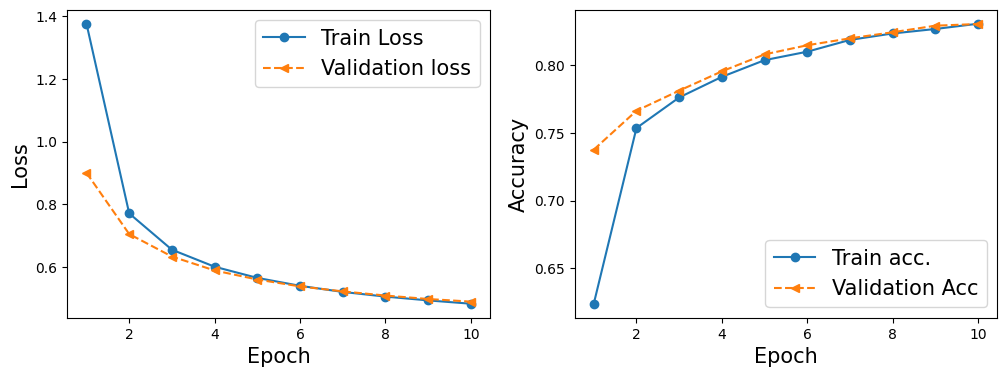

In [1453]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist1[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist1[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist1[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist1[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist1[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

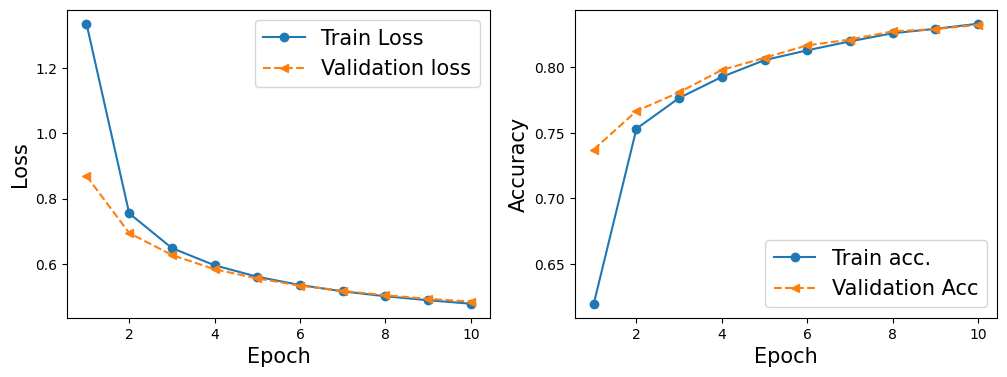

In [1454]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist2[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist2[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist2[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist2[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist2[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

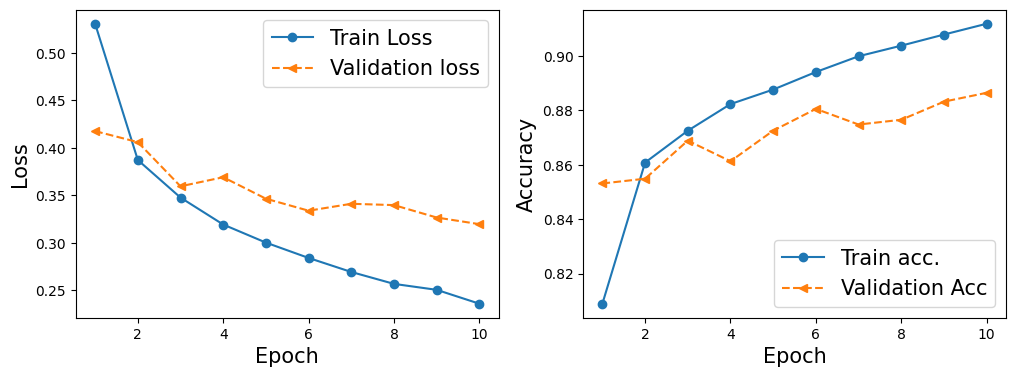

In [1455]:
# Write your code here.
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist3[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist3[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist3[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist3[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist3[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()


2 Convolutional Layers and 2 Fully Connected Layer CNN

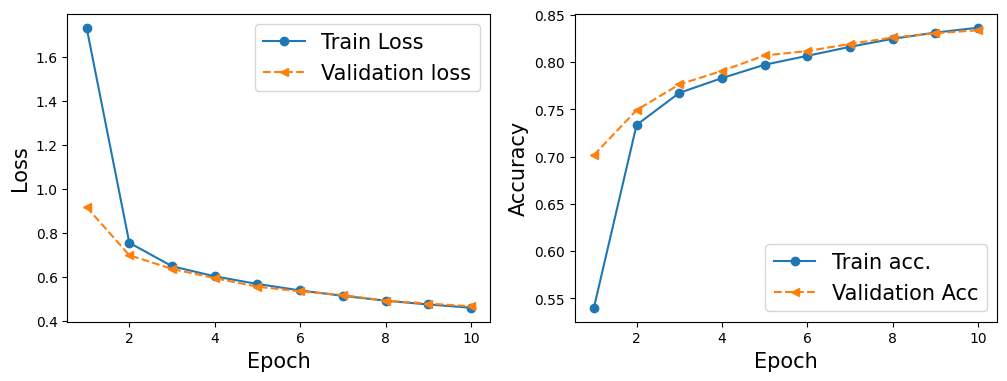

In [1456]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist1_cnn2[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist1_cnn2[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist1_cnn2[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist1_cnn2[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist1_cnn2[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

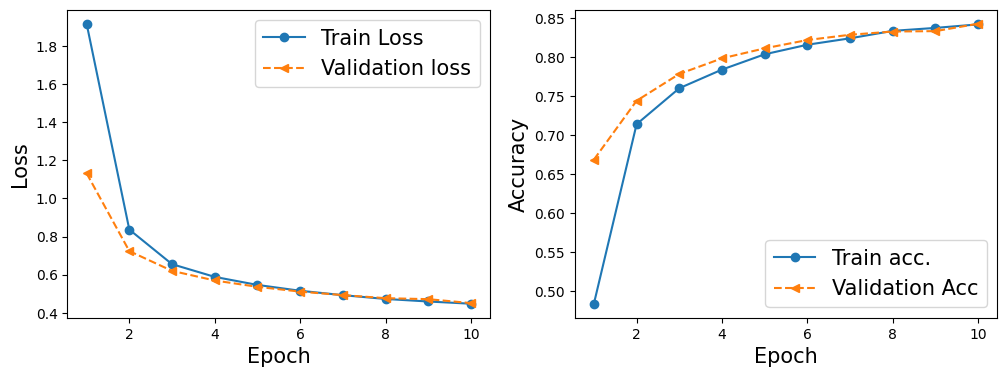

In [1457]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist2_cnn2[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist2_cnn2[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist2_cnn2[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist2_cnn2[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist2_cnn2[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

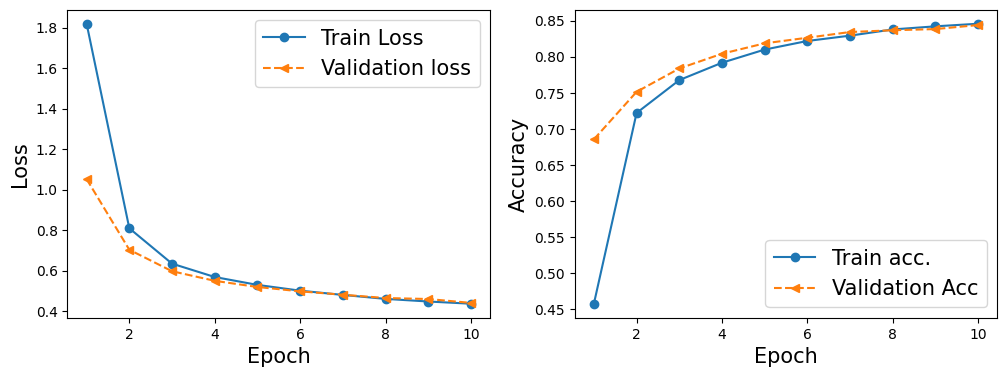

In [1458]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist3_cnn2[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist3_cnn2[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist3_cnn2[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist3_cnn2[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist3_cnn2[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

3 Convolution Layers and 3 Fully Connected Layers CNN

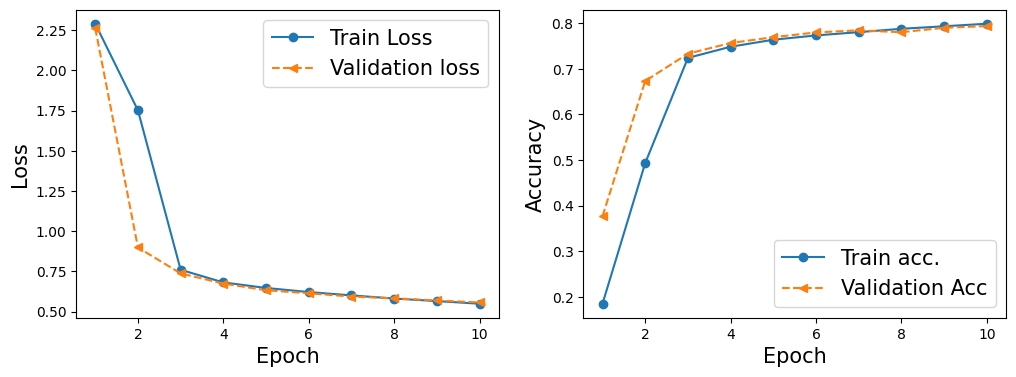

In [1459]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist1_cnn_33[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist1_cnn_33[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist1_cnn_33[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist1_cnn_33[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist1_cnn_33[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

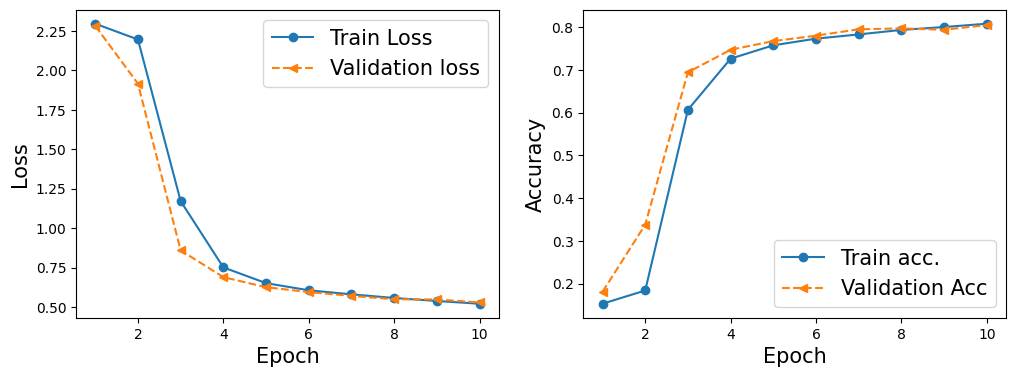

In [1460]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist2_cnn_33[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist2_cnn_33[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist2_cnn_33[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist2_cnn_33[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist2_cnn_33[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

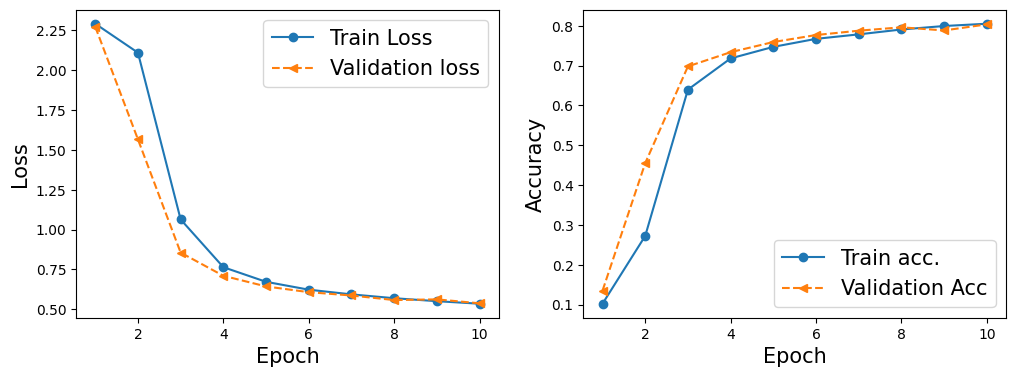

In [1461]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist3_cnn_33[0])) +1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist3_cnn_33[0],'-o',label = 'Train Loss')
ax.plot(x_arr,hist3_cnn_33[1],'--<',label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Loss',size = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist3_cnn_33[2],'-o',label = 'Train acc.')
ax.plot(x_arr,hist3_cnn_33[3],'--<',label = 'Validation Acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size = 15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

**2.3b** Describe at least **two** observations of the data plotted in this section.

In [1462]:
# Write your answer here

## 3. Denoising Autoencoder [16 marks]

### The CIFAR-10 dataset
In this assignment, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. Each sample is a 3-channel colour images of 32x32 pixels in size. There are 50,000 training images and 10,000 test images.

### 3.1: Data loading and manipulation [3 marks]

**3.1a** Download both the training and test data of the CIFAR-10 dataset, e.g., by following the pytorch CIFAR10 tutorial. You can also download via other ways if you prefer.

In [1463]:
import torch
import numpy as np
import torch.utils.data
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
torch.manual_seed(1784086)
import urllib.request

In [1464]:
# Write your code here.
batch_size = 16
num_workers = 4
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                               
cifar10_train = datasets.CIFAR10('data', train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10('data',train = False,transform = transform,download = True)

batch_size = 50
num_workers = 0
train_loader = torch.utils.data.DataLoader(cifar10_train,batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(cifar10_test,batch_size=batch_size,num_workers=num_workers)

classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']



Files already downloaded and verified
Files already downloaded and verified


**3.1b** Add random noise to all training and test data to generate noisy dataset, e.g., by torch.randn(), with a scaling factor scale, e.g., original image + scale * torch.randn(), and normalise/standardise the pixel values to the original range, e.g., using np.clip(). You may choose any scale value between 0.2 and 0.5.

A random transformation can be applied using a `Lambda` [transform](https://pytorch.org/vision/stable/transforms.html) when composing the load data transform, which looks a little like this:  
`transforms.Lambda(lambda x: x + ..... )`

Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using torch.manual_seed(). This seed needs to be used for all remaining code if there is randomness, for reproducibility.

You may want to create separate dataloaders for the noisy and clear images but make sure they are not shuffling the data so that correct pair of images are being given as input and desired output.

In [1465]:
# Write your code here.
scale = 0.3
def show_img(img):
    plt.imshow(np.transpose(img,(1,2,0)))
dataiter = iter(train_loader)
img,lbl = next(dataiter)
noisy_imgs = img+ scale * torch.randn(*img.shape)
noisy = np.clip(noisy_imgs,0.,1.)
img = img.numpy()
noisy = noisy.numpy()



**3.1c** Show 20 pairs of original and noisy images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


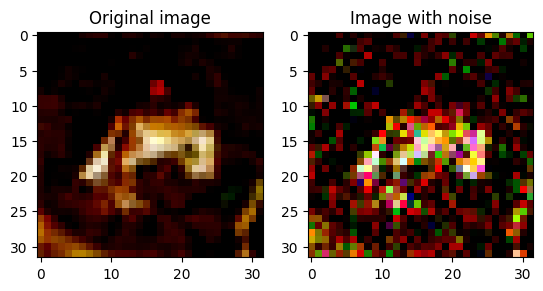

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


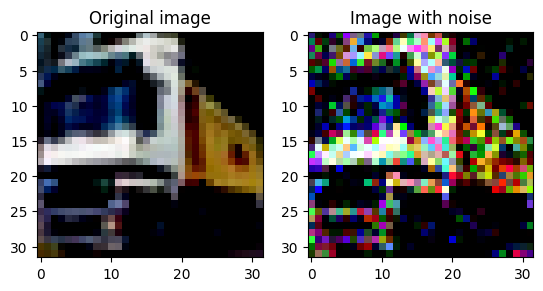

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


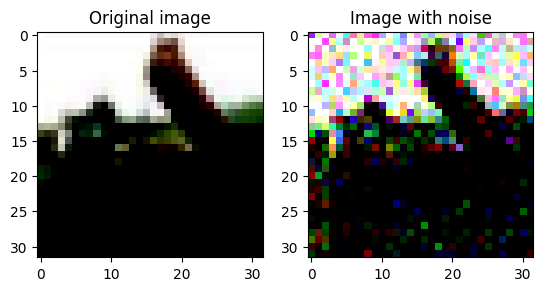

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


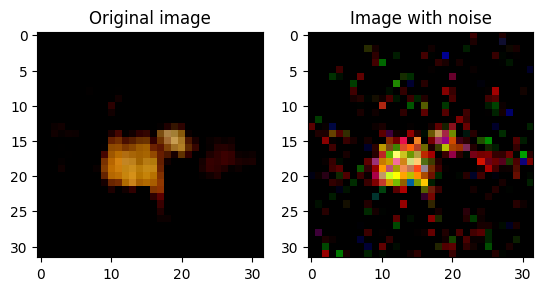

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


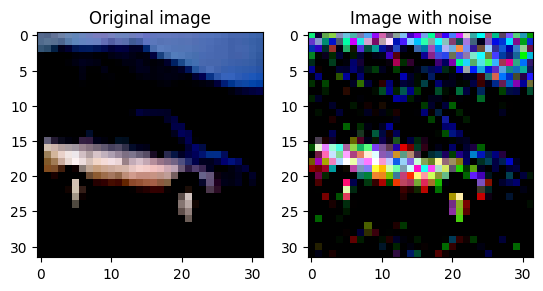

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


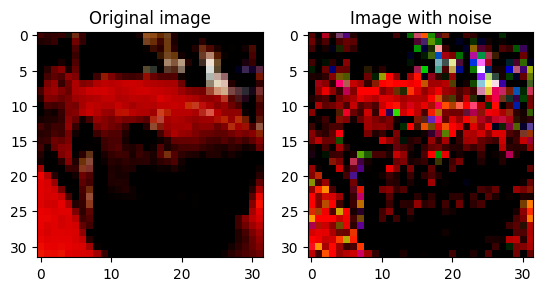

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


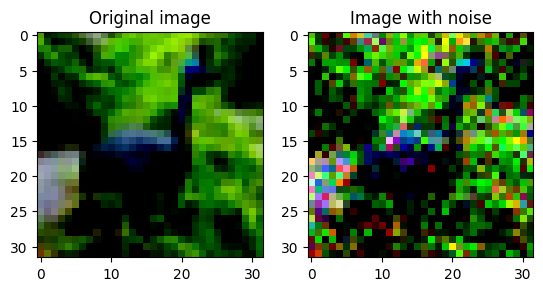

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


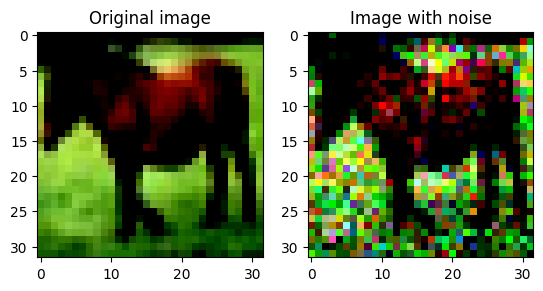

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


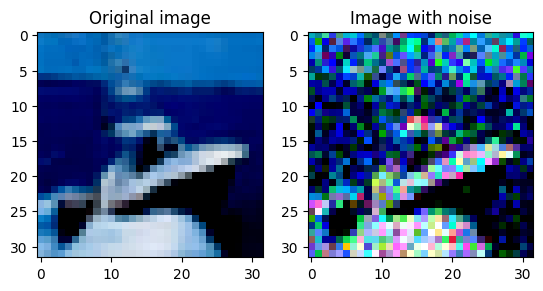

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


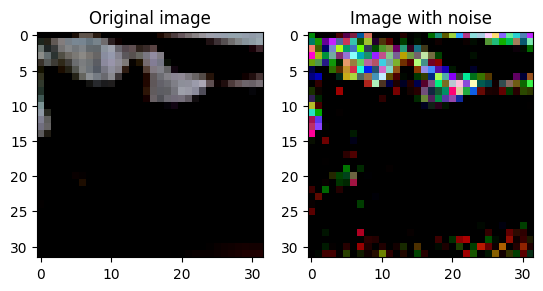

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


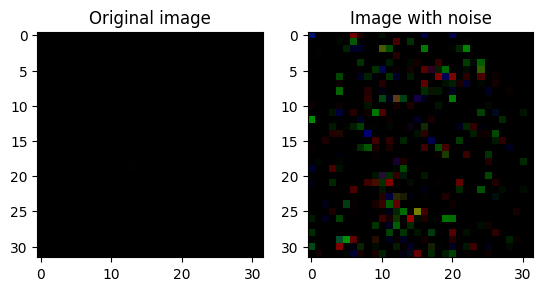

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


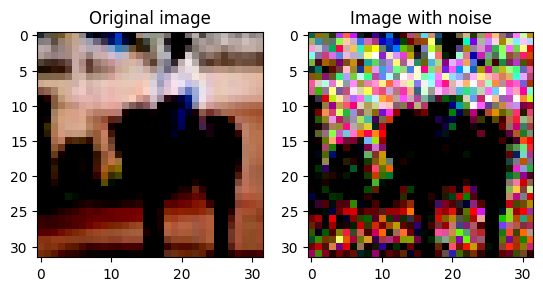

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


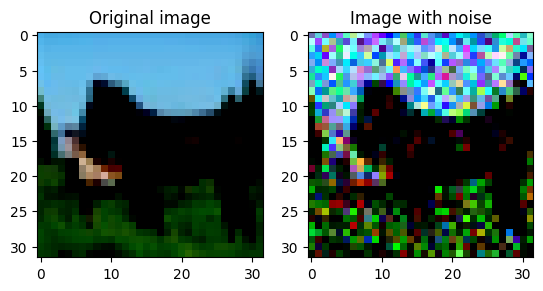

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


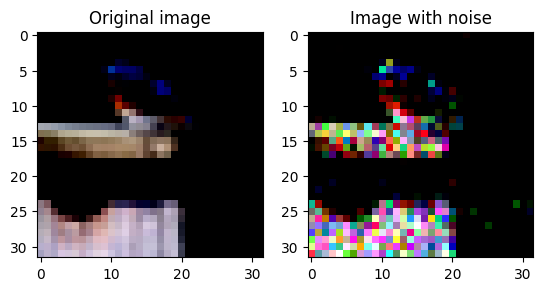

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


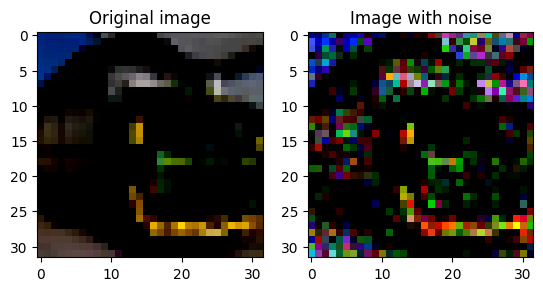

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


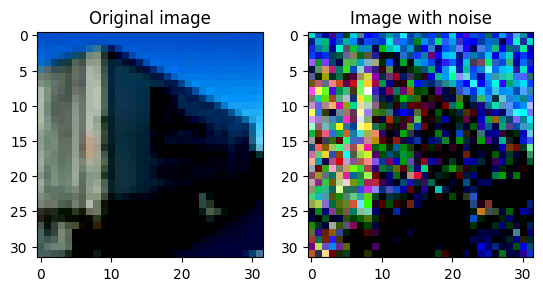

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


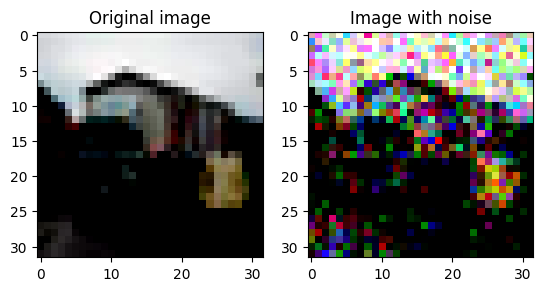

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


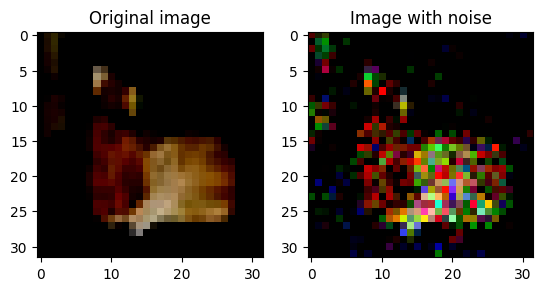

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


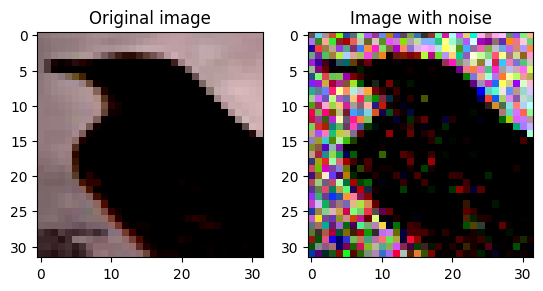

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


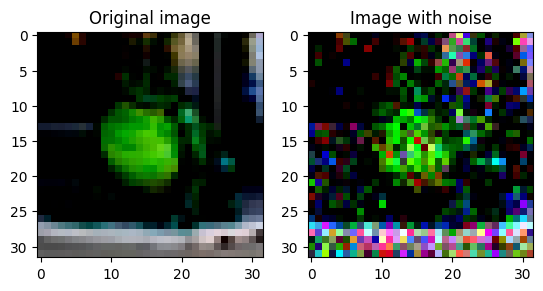

In [1466]:
idx = 20
for i in range(idx):
  plt.subplot(1,2,1)
  show_img(img[i])
  plt.title('Original image')
  plt.subplot(1,2,2)
  show_img(noisy[i])
  plt.title('Image with noise')
  plt.show()


### 3.2 Applying a Denoising Autoencoder to the modified CIFAR10 [10 marks]

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).
Read about denoising autoencoders at [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

**3.2a** Modify the autoencoder architecture in Lab 8 so that it takes colour images as input (i.e., 3 input channels).

In [1467]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),  # activation function
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # conv layer
            nn.ReLU(), # activation function 
            nn.Conv2d(32, 64, kernel_size=7, stride=1, padding=0) # conv layer
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7, stride=1, padding=0), # conv transpose layer
            nn.ReLU(), # activation function
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # conv transpose layer
            nn.ReLU(), # activation function
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

**3.2b** Training: feed the noisy training images as input to the autoencoder defined above; use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.



In [1468]:
def train_AE(model, dataset, max_epochs=20, print_steps=5):
    #Training (optimisation) parameters
    batch_size=64
    learning_rate=1e-3

    #Choose mean square error loss
    criterion = nn.MSELoss() 

    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-4)

    #Specify how the data will be loaded in batches (with random shuffling)
    #train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #Storage
    outputs = []
    
    #Start training
    for epoch in range(max_epochs):
        
        for img, label in dataset:
            noisy_imgs = img + scale * torch.randn(*img.shape)
            noisy_imgs = np.clip(noisy_imgs, 0., 1.)
            recon = model(noisy_imgs)
            loss = criterion(recon, img)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()  
            
            
            
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1,loss.item()))
        outputs.append(epoch)

    return outputs


In [1470]:
cae = ConvAutoencoder()
output = train_AE(cae,train_loader,max_epochs=6)

Epoch:1, Loss:0.2530
Epoch:2, Loss:0.2530
Epoch:3, Loss:0.2530
Epoch:4, Loss:0.1610
Epoch:5, Loss:0.1505
Epoch:6, Loss:0.1476


In [1471]:
criterion = nn.MSELoss()
learning_rate=1e-3


**3.2c** Testing: evaluate the autoencoder trained in 3.2b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the worst denoised 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

In [1472]:
# Write your code here.
from operator import itemgetter
cae.eval()


for img,_ in test_loader:
    noisy_imgs = img + scale * torch.randn(*img.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    recon = cae(noisy_imgs)
    loss = criterion(recon, img)   
print(loss.item())
                


0.15748219192028046


**3.2d** Choose at least **two** hyperparameters (e.g learning rate) to vary. Study at least **three** different choices for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. **Plot** the reconstruction error with respect to each of these hyper-parameters.

In [1473]:
# Write your code here.
learning_rates = [0.1,0.005,0.001]
max_epochs = 3
weight_decays = [0.1,0.01,1e-5]
final_dict = {}

for i in learning_rates:
        total_loss =0
        optimizer = torch.optim.Adam(cae.parameters(), lr=i, weight_decay=1e-5)
        for epoch in range(3):      
                for img, label in test_loader:
                        noisy_imgs = img+ scale * torch.randn(*img.shape)
                        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
                        recon = cae(noisy_imgs)
                        loss = criterion(recon, img)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()  
                        total_loss+=loss.item()
                        
                final_dict["LR:" +"Epoch"+ str(epoch)] = total_loss

for i in weight_decays:
        optimizer = torch.optim.Adam(cae.parameters(), lr=0.001, weight_decay=1e-5)
        for epoch in range(max_epochs):
                total_loss = 0
                optimizer = torch.optim.Adam(cae.parameters(), lr=0.001, weight_decay=i)
                for img, label in test_loader:
                        noisy_imgs = img + scale * torch.randn(*img.shape)
                        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
                        recon = cae(noisy_imgs)
                        loss = criterion(recon, img)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()  
                        total_loss+=loss.item()
                        
                final_dict["Epoch:"+str(epoch)] = total_loss
                



<BarContainer object of 6 artists>

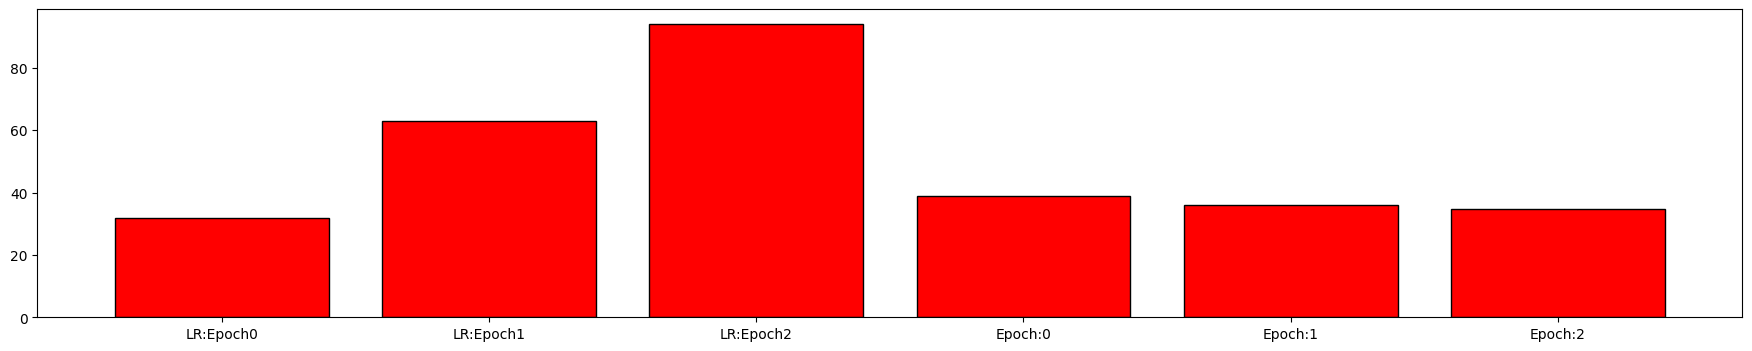

In [1474]:
plt.figure(figsize=(22, 4))  # width:20, height:3
plt.bar(list(final_dict.keys()), list(final_dict.values()), color='r', ec="k")

### 3.3 Discussion of results [3 marks]
**3.3a** Describe at least **two** interesting relevant observations from the evaluation results above.

In [ ]:
# Write your answer here.